In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
from algo import *
from util import *
from environment import *
from ids import *

In [2]:
def demo(price_list=np.linspace(0.01,1,100), segments=1000, update_freq=10, T=2000):
    start = time.time()
    exp_MAB_1 = pricing_MAB(price_list=price_list, segments=segments,update_freq=update_freq, exp='exp6', T=T)
    exp_MAB_1.segments_means(param1=3,param2=6)
    df1, df2 = exp_MAB_1.true_optimal()
    print('time:',time.time()-start)
    return exp_MAB_1, df1, df2

The true optimal arm in first 500 rounds is: 5
The true optimal arm in the rest is: 11
time: 24.93080973625183


<AxesSubplot:ylabel='Density'>

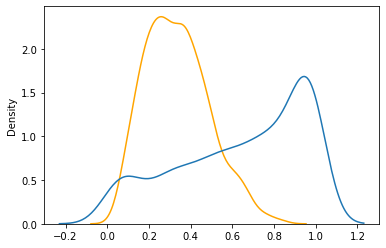

In [3]:
#changeable parameters
np.random.seed(999)
price_list=np.linspace(0.01,1,20)
T = 1000

#fix parameters
segments = 1000
update_freq = 10
trial_rounds = 1
exp_MAB_1, df1, df2 = demo(price_list=price_list, segments=segments, update_freq =10, T=T)
sns.kdeplot(exp_MAB_1.seg_means, color='orange')
sns.kdeplot(exp_MAB_1.seg_means_2)

In [4]:
#IDS_1
IDS_1_df = pd.DataFrame()
IDS_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_1 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=2,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100, eg_p=0.1)
    IDS_1_sum, IDS_1_pt, IDS_1_re, IDS_1_arm, IDS_1_post = IDS_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_1 time:',end-start)
    IDS_1_df = IDS_1_df.append([np.cumsum(IDS_1_re)])
    IDS_1_df_arm = IDS_1_df_arm.append([IDS_1_arm])

Reward change detected at time: 213
Detected Sign: -1
eg triggered at  237
arm
1.0     1.000000
4.0     0.839266
5.0     0.407673
6.0     0.754272
7.0     0.516997
11.0    1.000000
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
eg triggered at  269
arm
1.0     0.046494
4.0     0.301285
5.0     0.127663
7.0     0.338147
11.0    0.268854
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.001
Reward change detected at time: 504
Detected Sign: -1
Detector cooling
eg triggered at  557
arm
1.0     1.000000
4.0     0.006985
5.0     0.344064
6.0     0.212702
7.0     0.604623
8.0     0.358137
11.0    0.051363
14.0    0.157356
17.0    0.000717
Name: pvalue, dtype: float64
demand shape does not match
Reward change detected at time: 863
Detected Sign: -1
eg triggered at  890
arm
1.0     1.000000
4.0     1.000000
7.0     1.000000
11.0    0.102329
12.0    1.000000
14.0

In [5]:
demand_stage1, pmf_stage1, value_stage1 = generator_demo(IDS_1, t=300, size=10000)
demand_stage2, pmf_stage2, value_stage2 = generator_demo(IDS_1, t=800, size=10000)

In [6]:
true_value_stage1 = truevalue_generator(exp_MAB_1.seg_means, size=10000)
true_value_stage2 = truevalue_generator(exp_MAB_1.seg_means_2, size=10000)

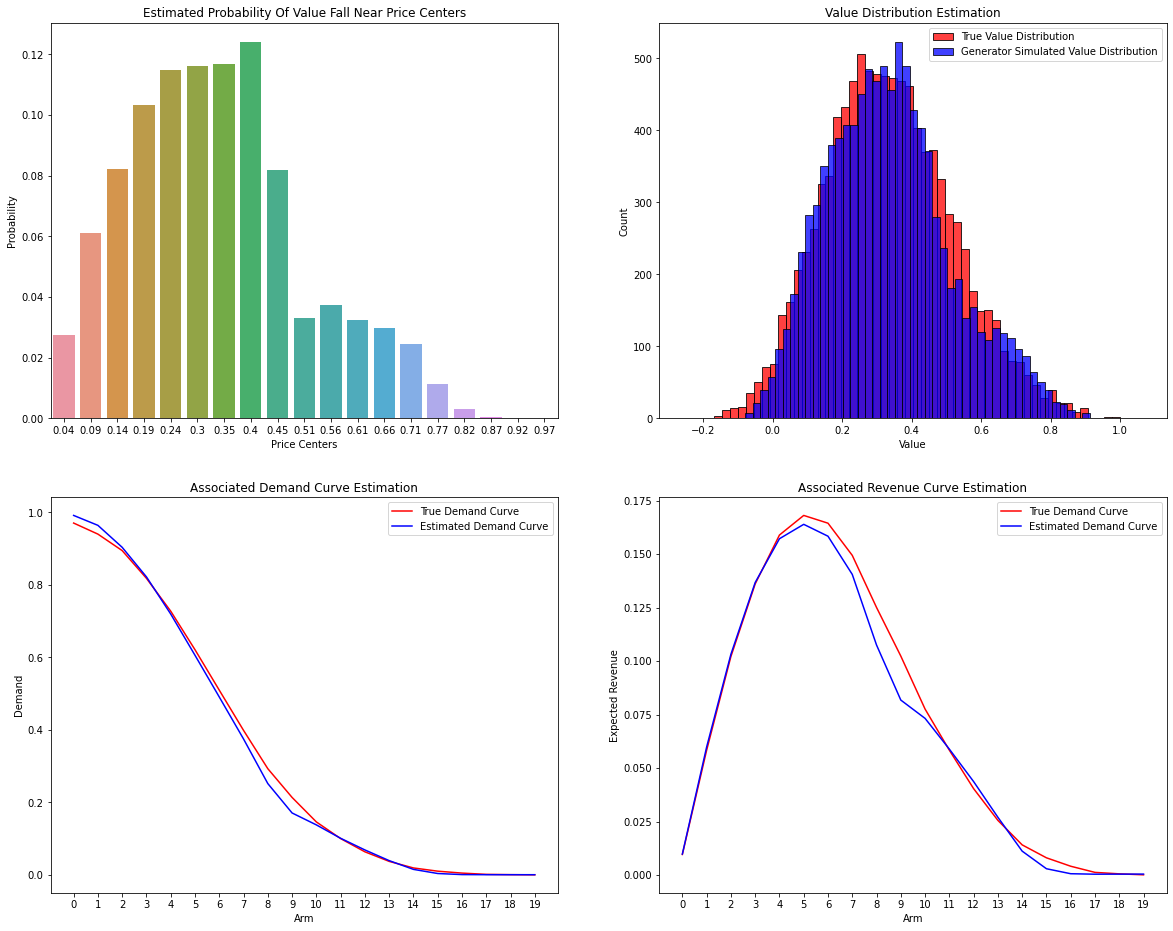

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20, 16))
#pmf
sns.barplot(ax=ax[0, 0], x=IDS_1.price_list_simu.round(2), y=pmf_stage1)
ax[0, 0].set_xlabel('Price Centers')
ax[0, 0].set_ylabel('Probability')
ax[0, 0].set_title('Estimated Probability Of Value Fall Near Price Centers')

#value
sns.histplot(ax=ax[0, 1], data=true_value_stage1, color='red')
sns.histplot(ax=ax[0, 1], data=value_stage1, color='blue')
ax[0, 1].legend(['True Value Distribution', 'Generator Simulated Value Distribution'])
ax[0, 1].set_xlabel('Value')
ax[0, 1].set_title('Value Distribution Estimation')

#demand
df1['demand'] = df1['reward'] / df1['price']
true_demand = df1.groupby('arm').demand.mean()/10
sns.lineplot(ax=ax[1, 0], data=true_demand, color='red')
sns.lineplot(ax=ax[1, 0], data=demand_stage1, color='blue')
ax[1, 0].legend(['True Demand Curve', 'Estimated Demand Curve'])
ax[1, 0].set_xlabel('Arm')
ax[1, 0].set_ylabel('Demand')
ax[1, 0].set_xticks(np.arange(20))
ax[1, 0].set_title('Associated Demand Curve Estimation')

#Revenue
sns.lineplot(ax=ax[1, 1], data=true_demand * price_list, color='red')
sns.lineplot(ax=ax[1, 1], data=demand_stage1 * price_list, color='blue')
ax[1, 1].legend(['True Demand Curve', 'Estimated Demand Curve'])
ax[1, 1].set_ylabel('Expected Revenue')
ax[1, 1].set_xlabel('Arm')
ax[1, 1].set_xticks(np.arange(20))
ax[1, 1].set_title('Associated Revenue Curve Estimation')

plt.show()

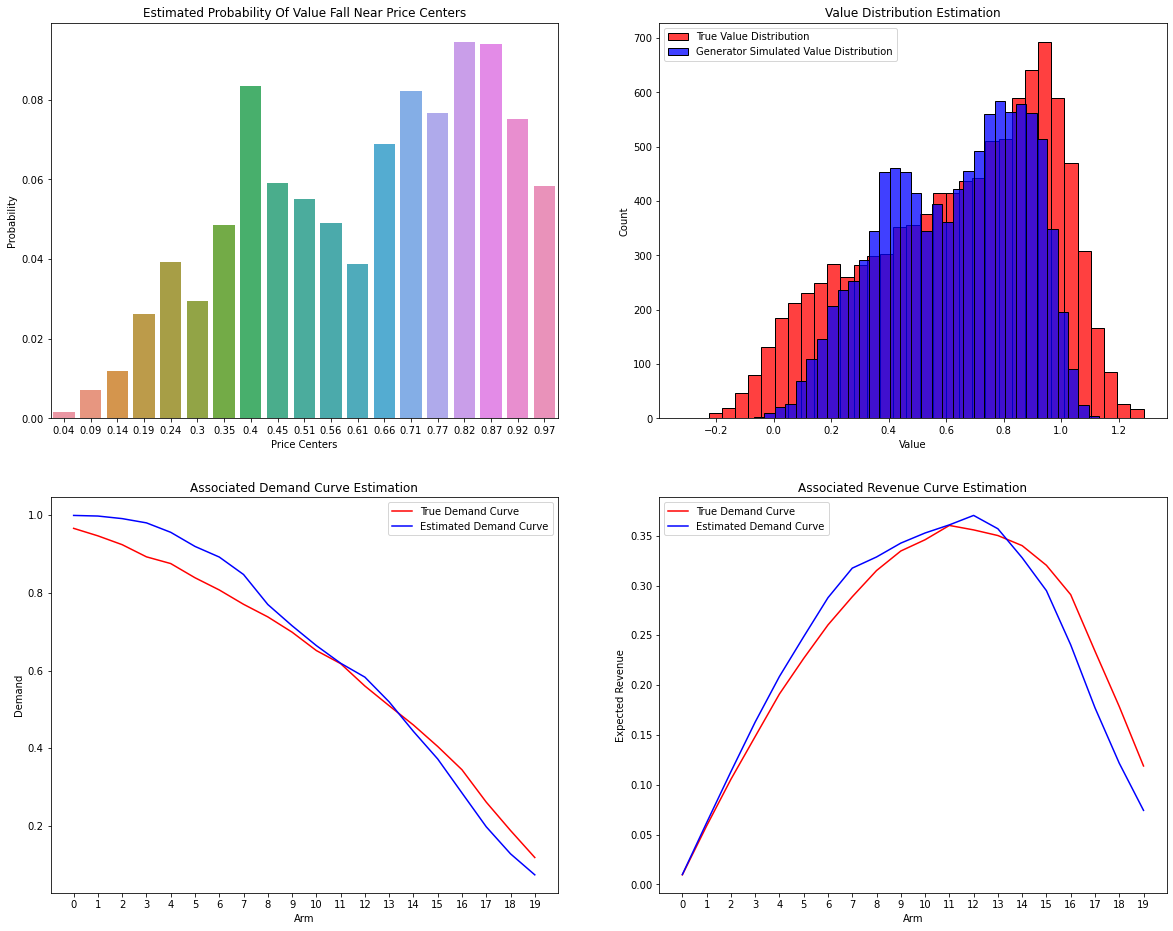

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20, 16))
#pmf
sns.barplot(ax=ax[0, 0], x=IDS_1.price_list_simu.round(2), y=pmf_stage2)
ax[0, 0].set_xlabel('Price Centers')
ax[0, 0].set_ylabel('Probability')
ax[0, 0].set_title('Estimated Probability Of Value Fall Near Price Centers')

#value
sns.histplot(ax=ax[0, 1], data=true_value_stage2, color='red')
sns.histplot(ax=ax[0, 1], data=value_stage2, color='blue')
ax[0, 1].legend(['True Value Distribution', 'Generator Simulated Value Distribution'])
ax[0, 1].set_xlabel('Value')
ax[0, 1].set_title('Value Distribution Estimation')

#demand
df2['demand'] = df2['reward'] / df2['price']
true_demand = df2.groupby('arm').demand.mean()/10
sns.lineplot(ax=ax[1, 0], data=true_demand, color='red')
sns.lineplot(ax=ax[1, 0], data=demand_stage2, color='blue')
ax[1, 0].legend(['True Demand Curve', 'Estimated Demand Curve'])
ax[1, 0].set_xlabel('Arm')
ax[1, 0].set_ylabel('Demand')
ax[1, 0].set_xticks(np.arange(20))
ax[1, 0].set_title('Associated Demand Curve Estimation')

#Revenue
sns.lineplot(ax=ax[1, 1], data=true_demand * price_list, color='red')
sns.lineplot(ax=ax[1, 1], data=demand_stage2 * price_list, color='blue')
ax[1, 1].legend(['True Demand Curve', 'Estimated Demand Curve'])
ax[1, 1].set_ylabel('Expected Revenue')
ax[1, 1].set_xlabel('Arm')
ax[1, 1].set_xticks(np.arange(20))
ax[1, 1].set_title('Associated Revenue Curve Estimation')

plt.show()